In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

#### 采用2022年500pa具有全部特征数据作数据分析，其他的数据没有全部的特征

In [2]:
filename_2022_500pa_all = '../../data/raw/2022_500pa.nc'
f_2022_500pa_all = nc.Dataset(filename_2022_500pa_all)   



### 查看模态数据信息

In [3]:

f_var = f_2022_500pa_all
all_vars_name = []
all_vars_long_name = []
all_vars_units = []
all_vars_shape = []

for key in f_var.variables.keys():
    all_vars_name.append(key)
    all_vars_long_name.append(f_var.variables[key].long_name)
    try:
        all_vars_units.append(f_var.variables[key].units)
    except:   
        all_vars_units.append('none')
    all_vars_shape.append(f_var.variables[key].shape)


a_vars_inf = pd.DataFrame(all_vars_name,columns = ['name'])
a_vars_inf['long_name'] = all_vars_long_name
a_vars_inf['units'] = all_vars_units
a_vars_inf['shape'] = all_vars_shape
a_vars_inf

,name,long_name,units,shape
0,longitude,longitude,degrees_east,"(81,)"
1,latitude,latitude,degrees_north,"(81,)"
2,expver,expver,none,"(2,)"
3,time,time,hours since 1900-01-01 00:00:00.0,"(5088,)"
4,cc,Fraction of cloud cover,(0 - 1),"(5088, 2, 81, 81)"
5,r,Relative humidity,%,"(5088, 2, 81, 81)"
6,clwc,Specific cloud liquid water content,kg kg**-1,"(5088, 2, 81, 81)"
7,q,Specific humidity,kg kg**-1,"(5088, 2, 81, 81)"
8,t,Temperature,K,"(5088, 2, 81, 81)"
9,u,U component of wind,m s**-1,"(5088, 2, 81, 81)"


### 模态数据分析（气象站点位置）

In [4]:
def select_data_point(name,f,point,latitude,longitude,left,right):
    # expver一部分有值，一部分没值分界点会随着当前时间变化 
    data = f[name]
    if 'expver' in f.variables.keys():
        print(data.shape)
        data = np.concatenate((data[:point,0,latitude,longitude],data[point:,1,latitude,longitude]))
    else:
        data = data[:,latitude,longitude]
    data = data[left:right]
    if name == 't':
        data = data
    plt.figure(figsize=(10, 3))
    plt.plot(np.arange(len(data)),data)
    plt.title(name)
    plt.show()
    return data

def select_all_data_point(names,f,point,latitude,longitude,left,right):
    df = pd.DataFrame([])
    for i in range(len(names)):
         df[names[i]] = select_data_point(names[i],f,point,latitude,longitude,left,right)
    station_2022 = pd.read_csv('../../data/raw/station_nan_2022.csv')

    df['tem'] = station_2022['tem']
   
    plt.figure(figsize=(10, 3))
    plt.plot(np.arange(right-left),station_2022[left:right].values)
    plt.title("station_tem")
    return df
        

(5088, 2, 81, 81)


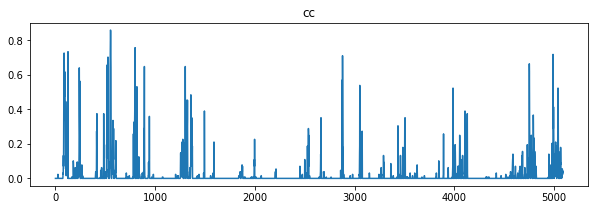

(5088, 2, 81, 81)


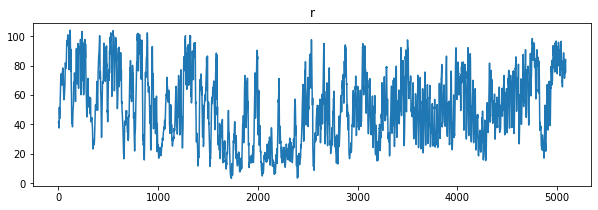

(5088, 2, 81, 81)


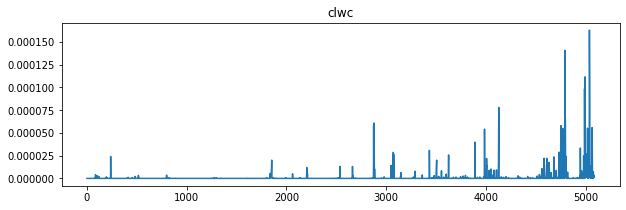

(5088, 2, 81, 81)


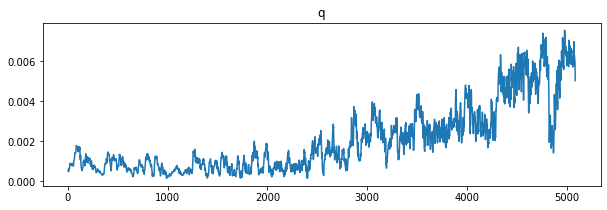

(5088, 2, 81, 81)


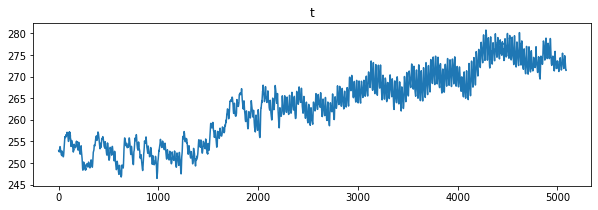

(5088, 2, 81, 81)


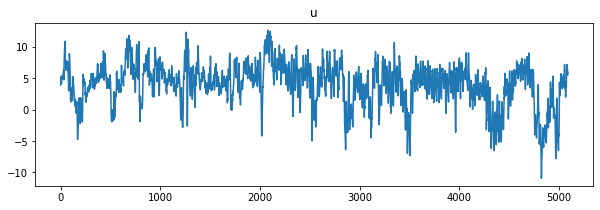

(5088, 2, 81, 81)


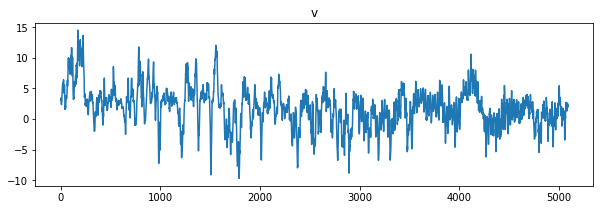

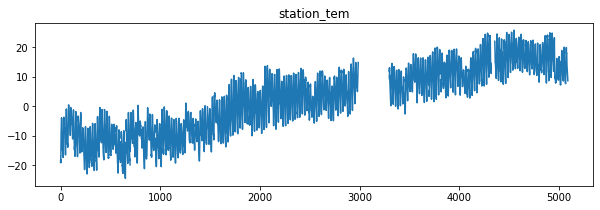

In [5]:

df = select_all_data_point(['cc', 'r', 'clwc', 'q', 't', 'u', 'v'],f_2022_500pa_all,3624,40,40,0,5088)

#### Pearson相关系数矩阵

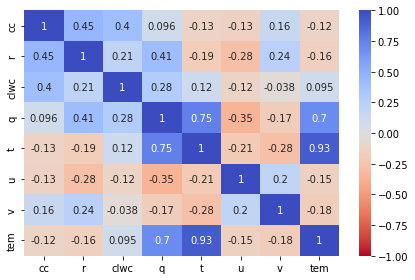

In [6]:
import seaborn as sns
corrmat = df.corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
# ax.set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

### 滞后特征分析

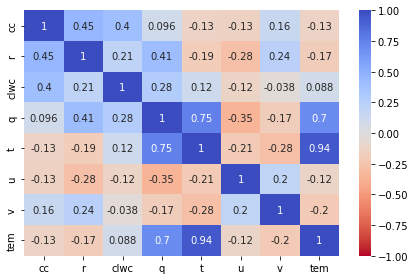

In [7]:
import seaborn as sns
df['tem'] = df['tem'].shift(2)
corrmat = df.corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
# ax.set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

# 1、处理模态数据

In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
f_2020_2021_400pa_500pa_t_q = nc.Dataset('../../data/raw/2020_2021_400pa_500pa_t_q.nc')   
f_2022_400pa_500pa_t_q = nc.Dataset('../../data/raw/2022_400pa_500pa_t_q.nc')   

### 模态温度（从k转换为摄氏度）
1696为阶段点，随着时间更新，跟expver有关

In [2]:
f_2022_400pa_500pa_t_q['t'].shape

(1944, 2, 2, 81, 81)

In [3]:
var1 = 't'
point = 1696
var1_2020_2022= np.concatenate((f_2020_2021_400pa_500pa_t_q[var1],np.concatenate((f_2022_400pa_500pa_t_q[var1][:point,0,::],f_2022_400pa_500pa_t_q[var1][point:,1,::]))))[:,:,:-1,:-1]-273.15
var1_2020_2022.shape

(7792, 2, 80, 80)

In [4]:
#  查看有没有空白，截断点选错会产生空白
# for i in range(0,7792,100):
    
#      #获取变量的数据
#     plt.imshow(var1_2012_2022[i][1],cmap='gray')
#     plt.show()

### 模态比湿度

In [5]:
var2 = 'q'
point = 1696
var2_2020_2022= np.concatenate((f_2020_2021_400pa_500pa_t_q[var2],np.concatenate((f_2022_400pa_500pa_t_q[var2][:point,0,::],f_2022_400pa_500pa_t_q[var2][point:,1,::]))))[:,:,:-1,:-1]-273.15
var2_2020_2022.shape

(7792, 2, 80, 80)

In [6]:
#  查看有没有空白，截断点选错会产生空白
# for i in range(0,7792,100):
    
#      #获取变量的数据
#     plt.imshow(var2_2012_2022[i][0],cmap='gray')
#     plt.show()

### 将温度、比湿度合并

In [7]:
muti_var_2020_2022 = np.concatenate((var1_2020_2022,var2_2020_2022),axis=1)
muti_var_2020_2022.shape

(7792, 4, 80, 80)

### 提取气象因子对应的时间跨度

In [8]:
f_2020_2021_400pa_500pa_t_q['time'].shape

(5848,)

In [9]:
f_2022_400pa_500pa_t_q['time'].shape

(1944,)

In [10]:

time_2020_2022 = np.concatenate((f_2020_2021_400pa_500pa_t_q['time'],f_2022_400pa_500pa_t_q['time']))
time_2020_2022.shape

(7792,)

In [11]:
time_2020_2022 = nc.num2date(time_2020_2022, f_2020_2021_400pa_500pa_t_q['time'].units)

In [12]:
for i in range(time_2020_2022.shape[0]):
    time_2020_2022[i] = time_2020_2022.data[i].strftime('%Y_%m_%d_%H')  

In [13]:
time_2020_2022[:].shape

(7792,)

In [14]:
time_2020_2022

masked_array(data=['2020_01_01_02', '2020_01_01_05', '2020_01_01_08', ...,
                   '2022_08_31_17', '2022_08_31_20', '2022_08_31_23'],
             mask=False,
       fill_value='?',
            dtype=object)

### 气象因子按时间拆分写入

In [15]:
# for i in range(muti_var_2020_2022.shape[0]):
#     np.save('../../data/informer/{}_400pa_500pa/{}.npy'.format('t_q',time_2020_2022[i]),muti_var_2020_2022[i].data)

In [16]:
# for i in range(var1_2020_2022.shape[0]):
#     np.save('../../data/informer/{}_400pa_500pa/{}.npy'.format(var1,time_2020_2022[i]),var1_2020_2022[i].data)

In [17]:
# for i in range(var2_2020_2022.shape[0]):
#     np.save('../../data/informer/{}_400pa_500pa/{}.npy'.format(var2,time_2020_2022[i]),var2_2020_2022[i].data)

In [18]:
## 400pa数据
# for i in range(muti_var_2020_2022.shape[0]):
#     np.save('../../data/informer/{}_400pa/{}.npy'.format('t_q',time_2020_2022[i]),muti_var_2020_2022[i][0].data)

In [21]:
# for i in range(var2_2020_2022.shape[0]):
#     np.save('../../data/informer/{}_400pa/{}.npy'.format(var1,time_2020_2022[i]),var1_2020_2022[i][0].data)

In [20]:
# for i in range(var2_2020_2022.shape[0]):
#     np.save('../../data/informer/{}_400pa/{}.npy'.format(var2,time_2020_2022[i]),var2_2020_2022[i][0].data)

# 2、站点温度数据处理

In [1]:
import pandas as pd
import numpy as np


C:\Users\cy511\.conda\envs\mypytorchenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cy511\.conda\envs\mypytorchenv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cy511\.conda\envs\mypytorchenv\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df_station_2122= pd.read_excel('../../data/raw/2021_2022.xlsx')
df_station_2122 =df_station_2122[['资料时间','温度']]
df_station_2122.columns = ['date','tem']
df_station_2122.head(8)

,date,tem
0,2021-01-01 00:00:00,-12.9
1,2021-01-01 01:00:00,-14.8
2,2021-01-01 02:00:00,-14.1
3,2021-01-01 03:00:00,-10.8
4,2021-01-01 04:00:00,-8.1
5,2021-01-01 15:00:00,-6.4
6,2021-01-01 16:00:00,-11.0
7,2021-01-01 17:00:00,-11.3


In [3]:
df_station_2122['date'] = pd.to_datetime(df_station_2122['date'])
df_station_2122.sort_values(by=['date'],inplace=True,ascending=True)

In [4]:
df_station_1920= pd.read_excel('../../data/raw/2019_2020.xlsx')
df_station_1920 = df_station_1920.iloc[:,-2:]
df_station_1920.columns=['date','tem']
df_station_1920.sort_values(by=['date'],inplace=True,ascending=True)
df_station_1920

,date,tem
0,2019-01-01 01:00:00,-18.3
1,2019-01-01 02:00:00,-18.2
2,2019-01-01 03:00:00,-16.4
3,2019-01-01 04:00:00,-14.2
4,2019-01-01 05:00:00,-10.5
...,...,...
17422,2020-12-31 19:00:00,-6.8
17423,2020-12-31 20:00:00,-10.6
17424,2020-12-31 21:00:00,-11.0
17425,2020-12-31 22:00:00,-11.7


In [5]:
df_station_1922 = pd.concat([df_station_1920,df_station_2122],axis=0)

<AxesSubplot:xlabel='date'>

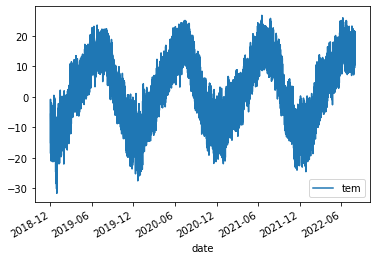

In [6]:
df_station_1922.set_index('date').plot()

In [7]:
df_station_1922

,date,tem
0,2019-01-01 01:00:00,-18.3
1,2019-01-01 02:00:00,-18.2
2,2019-01-01 03:00:00,-16.4
3,2019-01-01 04:00:00,-14.2
4,2019-01-01 05:00:00,-10.5
...,...,...
14499,2022-08-30 19:00:00,13.4
14500,2022-08-30 20:00:00,12.5
14493,2022-08-30 21:00:00,11.4
14494,2022-08-30 22:00:00,10.8


In [8]:
dates = pd.date_range(start="2019-01-01 01:00:00 ", end="2022-08-30 23:00:00",freq='H')

In [9]:
df_station_1922 = df_station_1922.set_index('date')

In [10]:
df_station_1922 = df_station_1922.reindex(dates) 

In [11]:
df_station_1922['2022-04']

/tmp/ipykernel_809488/2746501183.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_station_1922['2022-04']


,tem
2022-04-01 00:00:00,-7.8
2022-04-01 01:00:00,-7.8
2022-04-01 02:00:00,-3.0
2022-04-01 03:00:00,1.2
2022-04-01 04:00:00,2.9
...,...
2022-04-30 19:00:00,1.5
2022-04-30 20:00:00,0.5
2022-04-30 21:00:00,-0.9
2022-04-30 22:00:00,-1.4


In [12]:
df_station_1922.isnull().sum()

tem    172
dtype: int64

In [13]:
a = df_station_1922.isnull()

In [14]:
# a[a.tem==True].to_csv('./null.csv')

## 前后均值填充

In [15]:
df_station_1922["tem"] = df_station_1922["tem"].fillna(df_station_1922["tem"].interpolate())
df_station_1922.isnull().sum()

tem    0
dtype: int64

In [13]:
# df_station = pd.DataFrame(columns=['date'])
# df_stamp.date = list(tmp_stamp.date.values) + list(pred_dates[1:])

<AxesSubplot:>

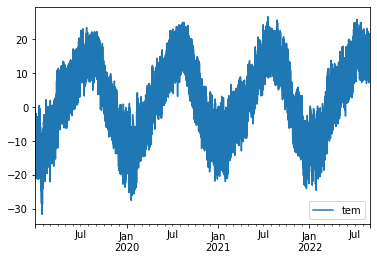

In [18]:
df_station_1922.plot()

In [19]:
df_station_1922 = df_station_1922[1::3]

In [21]:
df_station_1922 = df_station_1922[:-263]

In [22]:
# df_station_1922.to_csv('../../data/informer/station_19010102_22072902.csv')

## 选取20-22年数据作为模型输入

In [41]:
df_station_1922 = pd.read_csv('../../data/informer/station_19010102_22072902.csv')

In [43]:
df_station_1922.columns = ['date','tem']

In [45]:
df_station_1922 = df_station_1922.set_index('date')

In [49]:
df_station_1922['2020-01-01':'2022-05-01']

,tem
date,
2020-01-01 02:00:00,-18.6
2020-01-01 05:00:00,-9.1
2020-01-01 08:00:00,-6.7
2020-01-01 11:00:00,-7.7
2020-01-01 14:00:00,-9.3
...,...
2022-04-30 11:00:00,4.5
2022-04-30 14:00:00,3.1
2022-04-30 17:00:00,2.9


In [50]:
df_station_1922['2020-01-01':'2022-05-01'].to_csv('../Informer2020-main/data/tem_pre/station_20010102_22043023.csv')

In [58]:
df_station_1922['2022-01-28':'2022-05-01'].to_csv('../Informer2020-main/data/tem_pre/valid_station_22012802_22043023.csv')

## 19-22年温度数据处理结束，没发现异常值

In [6]:
dates = pd.date_range(start="2021-01-01 00:00:00 ", end="2022-08-30 15:00:00",freq='H')

In [7]:
df_station = df_station.reindex(dates) # 用新的数据去填充索引，缺失的索引补上，然后值设为NAN

In [8]:
df_station

,tem
2021-01-01 00:00:00,-12.9
2021-01-01 01:00:00,-14.8
2021-01-01 02:00:00,-14.1
2021-01-01 03:00:00,-10.8
2021-01-01 04:00:00,-8.1
...,...
2022-08-30 11:00:00,21.4
2022-08-30 12:00:00,20.4
2022-08-30 13:00:00,19.0
2022-08-30 14:00:00,17.2


In [9]:
df_station["tem"] = df_station["tem"].fillna(method='bfill')

In [10]:
df = df_station[2::3][2:]

In [11]:
df

,tem
2021-01-01 08:00:00,-0.2
2021-01-01 11:00:00,-0.9
2021-01-01 14:00:00,-5.8
2021-01-01 17:00:00,-11.3
2021-01-01 20:00:00,-15.8
...,...
2022-08-30 02:00:00,11.8
2022-08-30 05:00:00,16.2
2022-08-30 08:00:00,20.5
2022-08-30 11:00:00,21.4


In [12]:
df = df[:-260]

In [15]:
# df.to_csv('../../data/informer/station_21010108_22072902.csv')

In [14]:
df_station[df_station.datetime=='2021-05-05 11:00:00']

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [ ]:
df_station[df_station.datetime=='2021-05-31 05:00:00']

In [21]:
df_1 = df_station[2977:3595:3]

In [23]:
df_1['datetime'] = df_1['datetime'].apply(lambda x:pd.to_datetime(x).strftime('%Y/%m/%d %H:%M'))

C:\Users\cy511\AppData\Local\Temp/ipykernel_13452/3276236826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['datetime'] = df_1['datetime'].apply(lambda x:pd.to_datetime(x).strftime('%Y/%m/%d %H:%M'))


In [25]:
# df_1.to_csv('./tem.csv',index=False)

In [2]:
df_station_2022 = pd.read_excel('../../data/raw/raw_气象站数据.xlsx')
df_station_2022 = df_station_2022[['datetime','tem']]

In [3]:
df_station_2022['datetime'] = pd.to_datetime(df_station_2022['datetime'])
df_station_2022.sort_values(by=['datetime'],inplace=True,ascending=True)
df_station_2022.head()

,datetime,tem
10267,2021-05-13 00:00:00,1.3
10266,2021-05-13 01:00:00,1.5
10265,2021-05-13 02:00:00,3.8
10264,2021-05-13 03:00:00,4.4
10263,2021-05-13 09:00:00,10.0


In [4]:
df_station_2022.describe()

,tem
count,10268.000000
mean,101.524601
std,9868.592341
min,-271.700000
25%,-5.100000
50%,6.500000
75%,13.300000
max,999999.000000


<AxesSubplot:xlabel='datetime'>

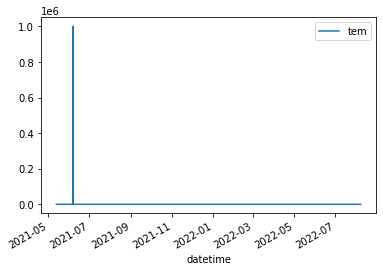

In [5]:
df_station_2022.set_index('datetime').plot()

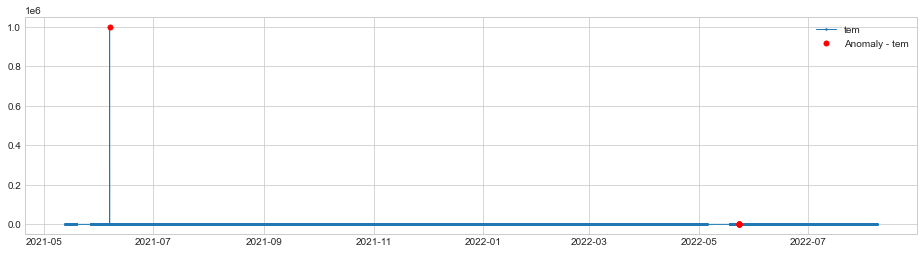

In [6]:
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=50, low=-50)
anomalies = threshold_ad.detect(df_station_2022.set_index('datetime'))


# from adtk.detector import QuantileAD
# quantile_ad = QuantileAD(high=0.99, low=0.01)
# anomalies = quantile_ad.fit_detect(df_station_2022.set_index('datetime'))

from adtk.visualization import plot
plot(df_station_2022.set_index('datetime'), anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

## 站点数据异常值处理

In [7]:
df_station_2022["tem"][df_station_2022.tem<-50]=np.nan
df_station_2022["tem"][df_station_2022.tem>50]=np.nan
# df_station_2022["tem"] = df_station_2022["tem"].fillna(method='ffill')

C:\Users\cy511\AppData\Local\Temp/ipykernel_23992/3940502552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station_2022["tem"][df_station_2022.tem<-50]=np.nan
C:\Users\cy511\AppData\Local\Temp/ipykernel_23992/3940502552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station_2022["tem"][df_station_2022.tem>50]=np.nan


In [8]:
df_station_2022.isnull().sum()

datetime    0
tem         6
dtype: int64

## 站点数据缺失值处理（原来不存在）

In [9]:
df_station_2022 = df_station_2022.set_index('datetime')
dates = pd.date_range(start="2021/5/13 ", end="2022/8/8",freq='H')
df_station_2022 = df_station_2022.reindex(dates) # 用新的数据去填充索引，缺失的索引补上，然后值设为NAN

In [10]:
df_station_2022.values.shape

(10849, 1)

In [11]:
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

# sns.heatmap(df_station_2022.T.isna(), cmap='Reds_r')
# ax.set_title('Missing Values', fontsize=16)

# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
# plt.show()

<AxesSubplot:>

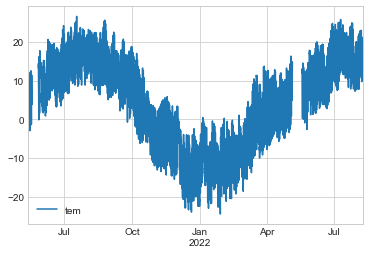

In [12]:
# 通过图像定位大面积缺失值位置
df_station_2022.plot()

In [13]:
# df_station_2022['2021/5/20']
# 再前向填充，补充个别的缺失值
df_station_2022["tem"] = df_station_2022["tem"].fillna(method='bfill')

## 找到两处比较大的缺失值
2021/5/19 5:00:00 - 2021/5/27 7:00:00 


2022/5/5 9:00:00 - 2022/5/18 3:00:00 



In [14]:
df_2022_re= df_station_2022['2021/5/27 08:00:00':'2022/5/05 8:00:00'] # 8233条


In [15]:
df_2022_re_3h = df_2022_re[::3] # 等距采样切片

In [16]:
df_2022_re_3h['date'] = df_2022_re_3h.index
df_2022_re_3h.head(8)

C:\Users\cy511\AppData\Local\Temp/ipykernel_23992/2119367137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_re_3h['date'] = df_2022_re_3h.index


,tem,date
2021-05-27 08:00:00,13.3,2021-05-27 08:00:00
2021-05-27 11:00:00,14.5,2021-05-27 11:00:00
2021-05-27 14:00:00,11.4,2021-05-27 14:00:00
2021-05-27 17:00:00,6.8,2021-05-27 17:00:00
2021-05-27 20:00:00,3.7,2021-05-27 20:00:00
2021-05-27 23:00:00,0.7,2021-05-27 23:00:00
2021-05-28 02:00:00,5.5,2021-05-28 02:00:00
2021-05-28 05:00:00,11.7,2021-05-28 05:00:00


In [17]:
# df_2022_re_3h['date'] = df_2022_re_3h['date'].dt.date

In [18]:
df_2022_re_3h.head()

,tem,date
2021-05-27 08:00:00,13.3,2021-05-27 08:00:00
2021-05-27 11:00:00,14.5,2021-05-27 11:00:00
2021-05-27 14:00:00,11.4,2021-05-27 14:00:00
2021-05-27 17:00:00,6.8,2021-05-27 17:00:00
2021-05-27 20:00:00,3.7,2021-05-27 20:00:00


In [19]:
# df_2022_re_3h.info()

In [20]:
# df_2022_re_3h['date'] = pd.to_datetime(df_2022_re_3h['date'])

In [21]:
# df_2022_re_3h['date'] = df_2022_re_3h.time.apply(lambda x:x.strftime('%Y/%m/%d'))
df_2022_re_3h.head()

,tem,date
2021-05-27 08:00:00,13.3,2021-05-27 08:00:00
2021-05-27 11:00:00,14.5,2021-05-27 11:00:00
2021-05-27 14:00:00,11.4,2021-05-27 14:00:00
2021-05-27 17:00:00,6.8,2021-05-27 17:00:00
2021-05-27 20:00:00,3.7,2021-05-27 20:00:00


In [22]:
df_2022_re_3h = df_2022_re_3h.set_index('date')

df_2022_re_3h.head()

,tem
date,
2021-05-27 08:00:00,13.3
2021-05-27 11:00:00,14.5
2021-05-27 14:00:00,11.4
2021-05-27 17:00:00,6.8
2021-05-27 20:00:00,3.7


In [39]:
# df_2022_re_3h.to_csv('../../data/informer/station_s_21051708_22050508.csv')

In [44]:
# valid_2022_6_7_re_3h.to_csv('../../data/informer/valid_station_s_22053108_22073108.csv')

# 拆分训练集、测试集

In [43]:
df =  pd.read_csv('../../data/informer/station_s_21051708_22050508.csv')
df.head(8)

,date,tem
0,2021-05-27 08:00:00,13.3
1,2021-05-27 11:00:00,14.5
2,2021-05-27 14:00:00,11.4
3,2021-05-27 17:00:00,6.8
4,2021-05-27 20:00:00,3.7
5,2021-05-27 23:00:00,0.7
6,2021-05-28 02:00:00,5.5
7,2021-05-28 05:00:00,11.7


In [18]:
df.date = pd.to_datetime(df.date).apply(lambda x:x.strftime('%Y_%m_%d_%H'))
df.head()

,date,tem
0,2021_05_27_08,13.3
1,2021_05_27_11,14.5
2,2021_05_27_14,11.4
3,2021_05_27_17,6.8
4,2021_05_27_20,3.7


In [19]:
# df_train

(2745, 2)